# Neural Networks Sprint Challenge

## 1) Define the following terms:

- Neuron
- Input Layer
- Hidden Layer
- Output Layer
- Activation
- Backpropagation

 YOUR ANSWER HERE

## 2) Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 1  | 1  | 1  | 1 |
| 1  | 0  | 1  | 0 |
| 0  | 1  | 1  | 0 |
| 0  | 0  | 1  | 0 |

In [4]:
%matplotlib inline

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from functools import reduce
import requests
from sklearn.preprocessing import StandardScaler
from scipy import optimize

In [51]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [28]:
class Perceptron_AND(object):
    def __init__(self, rate=0.01, niter=10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        self.weight = np.zeros(X.shape[1])
        self.errors = []
        self.pa = []
        min_y = 0.2
        for i in range(self.niter):

                  # Weighted sum of inputs and weights
            weighted_sum = self.net_input(X)

            # Activate with sigmoid function
            activated_output = sigmoid(weighted_sum)

            predicty = np.array([1 if a >= min_y else 0 for a in activated_output])
            
            # Calculate Error   
            error = y - predicty
            err = reduce((lambda sum_,e: sum_ + int(e != 0)),error,0)                    
            self.errors.append(err)

            # Calculate weight adjustments with sigmoid_derivative
            adjustments = self.rate * error * sigmoid_derivative(activated_output)

            # Update weights
            self.weight += np.dot(X.T, adjustments)                    
            self.pa.append(predicty)

        print('weights', self.weight)
        return self

    def net_input(self, X):
        return np.dot(X, self.weight)   
    
    def predict(self, X):
        return np.where(self.net_input(X) >= min_y, 1, 0)

In [29]:
X = np.array([[1, 1, 1, 1],
              [1, 0, 1, 0],
              [0, 1, 1, 0],
              [0, 0, 1, 0]])
y = [1, 0, 0, 0]

weights [-0.14009505 -0.14009505 -1.40790354  0.32218799]


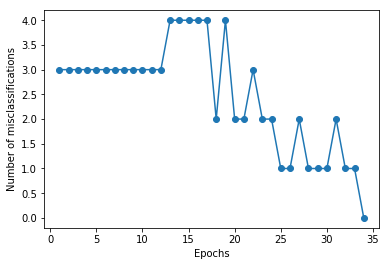

In [33]:
pn = Perceptron_AND(0.1, 34)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [34]:
print(min(pn.errors))
index = min(range(len(pn.errors)), key=pn.errors.__getitem__)
index

0


33

In [35]:
confusion_matrix(y, pn.pa[index])

array([[3, 0],
       [0, 1]])

## 3) Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. 
- Your network must have one hidden layer. 
- You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
- Train your model on the Heart Disease dataset from UCI:

[Github Dataset](https://github.com/ryanleeallred/datasets/blob/master/heart.csv)

[Raw File on Github](https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv)


In [39]:
url="https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv"
df = pd.read_csv(url)

In [140]:
df.tail(1000)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [56]:
X = StandardScaler().fit_transform(df.drop('target', axis=1))
y = df[['target']].values

/home/mark/anaconda3/envs/myf/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mark/anaconda3/envs/myf/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [57]:
X.shape,y.shape,type(X),type(y)

((303, 13), (303, 1), numpy.ndarray, numpy.ndarray)

In [63]:
df.target.unique()

array([1, 0])

In [74]:
NN = Neural_Network()
T = trainer(NN)
T.train(X,y)

/home/mark/anaconda3/envs/myf/lib/python3.6/site-packages/scipy/optimize/_minimize.py:501: RuntimeWarning: Method Powell does not use gradient information (jac).
  RuntimeWarning)
/home/mark/anaconda3/envs/myf/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in square
/home/mark/anaconda3/envs/myf/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


Optimization terminated successfully.
         Current function value: 13.948081
         Iterations: 27
         Function evaluations: 30615


In [75]:
print("Predicted Output: \n" + str(NN.forward(X))) 
print("Loss: \n" + str(np.mean(np.square(y - NN.forward(X))))) # mean sum squared loss

Predicted Output: 
[[4.06779028e-01]
 [7.75834622e-01]
 [9.99439700e-01]
 [9.98957417e-01]
 [9.11897502e-01]
 [8.89267064e-01]
 [9.99619338e-01]
 [9.91647029e-01]
 [8.16144533e-01]
 [9.65437622e-01]
 [7.76601114e-01]
 [9.99439700e-01]
 [9.91647029e-01]
 [4.06778915e-01]
 [9.11527567e-01]
 [9.81132811e-01]
 [9.91783500e-01]
 [9.11527567e-01]
 [7.76632903e-01]
 [9.11527567e-01]
 [3.97758159e-02]
 [9.91647029e-01]
 [9.81033753e-01]
 [4.06778915e-01]
 [7.75834622e-01]
 [3.82541330e-01]
 [9.10718377e-01]
 [7.75834622e-01]
 [9.11527567e-01]
 [9.36744867e-01]
 [9.99439700e-01]
 [3.97756812e-02]
 [9.99291076e-01]
 [7.75794281e-01]
 [7.75834622e-01]
 [9.81132811e-01]
 [9.81132810e-01]
 [7.75735734e-01]
 [9.11527567e-01]
 [9.11527567e-01]
 [9.81132811e-01]
 [9.91647029e-01]
 [1.72922474e-01]
 [7.58536588e-01]
 [9.91703604e-01]
 [9.91647029e-01]
 [9.81066912e-01]
 [7.75834638e-01]
 [9.99439700e-01]
 [9.81217699e-01]
 [9.81132811e-01]
 [3.97758159e-02]
 [3.96006528e-02]
 [9.99238315e-01]
 [9.11527

In [96]:
class Neural_Network(object):
    def __init__(self):
        self.inputs = X.shape[1]
        self.hiddenNodes = 3
        self.outputNodes = 1
        self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) # (2x3)
        self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes) # (3x1)
        self.min_y = 0.1
    def feed_forward(self, X):
        # Weighted sum between inputs and hidden layer
        self.hidden_sum = np.dot(X, self.L1_weights)
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.L2_weights)
        # final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
#         print('ot',self.activated_output.shape)
        nd = np.ndarray((X.shape[0],1), dtype=int)
        for i,x in enumerate(self.activated_output):
            nd[i] = 1 if x > self.min_y else 0
        return nd

    def sigmoid(self, s):
        return 1/(1+np.exp(-s))        
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def backward(self, X, y, o):
        # backward propgate through the network
        self.o_error = y - o # error in output
        self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

        self.z2_error = self.o_delta.dot(self.L2_weights.T) # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden) # applying derivative of sigmoid to z2 error

        self.L1_weights += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
        self.L2_weights += self.activated_hidden.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

    def train (self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)  

In [97]:
NN = Neural_Network()
output = NN.feed_forward(X[0:3])
print("output: ", output)
print(X[0:4])

output:  [[1]
 [1]
 [1]]
[[ 0.9521966   0.68100522  1.97312292  0.76395577 -0.25633371  2.394438
  -1.00583187  0.01544279 -0.69663055  1.08733806 -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 -0.09273778  0.07219949 -0.41763453
   0.89896224  1.63347147 -0.69663055  2.12257273 -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 -0.09273778 -0.81677269 -0.41763453
  -1.00583187  0.97751389 -0.69663055  0.31091206  0.97635214 -0.71442887
  -0.51292188]
 [ 0.18017482  0.68100522  0.03203122 -0.66386682 -0.19835726 -0.41763453
   0.89896224  1.23989692 -0.69663055 -0.20670527  0.97635214 -0.71442887
  -0.51292188]]


In [98]:
NN = Neural_Network()
for i in range(1000): # trains the NN 1,000 times
    if i+1 in [1,2,3,4,5] or (i+1) % 50 == 0:
        print('+---------- EPOCH', i+1, '-----------+')
#         print("Input: \n", X) 
#         print("Actual Output: \n", y)  
#         print("Predicted Output: \n" + str(NN.feed_forward(X))) 
        print("Loss: \n" + str(np.mean(np.square(y - NN.feed_forward(X))))) # mean sum squared loss
        print("\n")
    NN.train(X, y)

+---------- EPOCH 1 -----------+
Loss: 
0.3234323432343234


+---------- EPOCH 2 -----------+
Loss: 
0.5247524752475248


+---------- EPOCH 3 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 4 -----------+
Loss: 
0.5445544554455446


+---------- EPOCH 5 -----------+
Loss: 
0.17491749174917492


+---------- EPOCH 50 -----------+
Loss: 
0.1353135313531353


+---------- EPOCH 100 -----------+
Loss: 
0.14521452145214522


+---------- EPOCH 150 -----------+
Loss: 
0.1353135313531353


+---------- EPOCH 200 -----------+
Loss: 
0.13861386138613863


+---------- EPOCH 250 -----------+
Loss: 
0.5346534653465347


+---------- EPOCH 300 -----------+
Loss: 
0.13861386138613863


+---------- EPOCH 350 -----------+
Loss: 
0.1353135313531353


+---------- EPOCH 400 -----------+
Loss: 
0.132013201320132


+---------- EPOCH 450 -----------+
Loss: 
0.42574257425742573


+---------- EPOCH 500 -----------+
Loss: 
0.1353135313531353


+---------- EPOCH 550 -----------+
Loss: 
0.19141914191419143

## 4) Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy. 

- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network. 
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- When hyperparameter tuning, show you work by adding code cells for each new experiment. 
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [124]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy
# fix random seed for reproducibility
numpy.random.seed(42)
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [108]:
X.shape,y.shape,type(X),type(y)

((303, 13), (303, 1), numpy.ndarray, numpy.ndarray)

In [101]:
opt = optimizers.adam(lr=0.01)

In [102]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [118]:
# Important Hyperparameters
inputs = X.shape[1]
epochs = 50
batch_size = 10

def create_model():
    # Create Model
    model = Sequential()
    model.add(Dense(3, activation='relu', input_shape=(inputs,)))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile Model  
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [119]:
model = create_model()
# Fit Model
history = model.fit(X, y, validation_split=0.20, epochs=epochs,
                    batch_size=batch_size, verbose=1, callbacks=[reduce_lr])

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 0s 1ms/step - loss: 0.6891 - acc: 0.5950 - val_loss: 0.7715 - val_acc: 0.1475
Epoch 2/50
242/242 [==============================] - 0s 381us/step - loss: 0.6540 - acc: 0.6901 - val_loss: 0.8426 - val_acc: 0.0492
Epoch 3/50
242/242 [==============================] - 0s 428us/step - loss: 0.6345 - acc: 0.6983 - val_loss: 0.8710 - val_acc: 0.0492
Epoch 4/50
242/242 [==============================] - 0s 393us/step - loss: 0.6200 - acc: 0.6983 - val_loss: 0.9131 - val_acc: 0.0328
Epoch 5/50
242/242 [==============================] - 0s 363us/step - loss: 0.6029 - acc: 0.6942 - val_loss: 0.9140 - val_acc: 0.0656
Epoch 6/50
242/242 [==============================] - 0s 412us/step - loss: 0.5785 - acc: 0.7066 - val_loss: 0.9210 - val_acc: 0.1475
Epoch 7/50
242/242 [==============================] - 0s 467us/step - loss: 0.5431 - acc: 0.7727 - val_loss: 0.8633 - val_acc: 0.3607
Epoch 8/50
242/242 

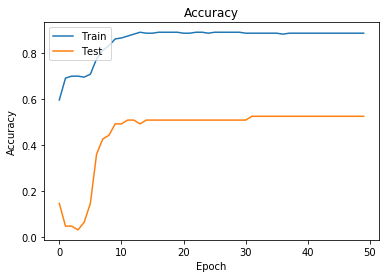

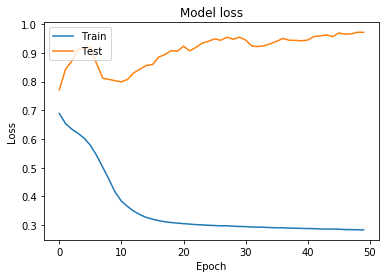

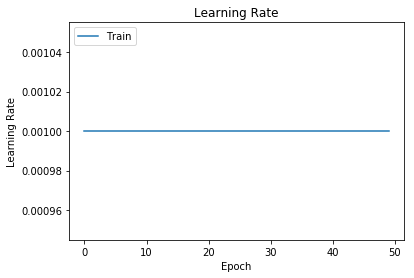

In [120]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['lr'])
plt.title('Learning Rate')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [125]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

In [130]:
Y = y
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
# batch_size = [10, 20, 40, 60, 80, 100]
# epochs = [20]
# param_grid = dict(batch_size=batch_size, epochs=epochs)

# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [15]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)

 

In [131]:
# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.6336633761723837 using {'batch_size': 20, 'epochs': 15}
Means: 0.5412541265436525, Stdev: 0.21101474431986636 with: {'batch_size': 10, 'epochs': 15}
Means: 0.6336633761723837, Stdev: 0.11742869751631232 with: {'batch_size': 20, 'epochs': 15}
Means: 0.4026402718950026, Stdev: 0.2919626516235909 with: {'batch_size': 40, 'epochs': 15}
Means: 0.5643564309224044, Stdev: 0.24533686323837212 with: {'batch_size': 60, 'epochs': 15}
Means: 0.39933994186199934, Stdev: 0.29196265475783356 with: {'batch_size': 80, 'epochs': 15}
Means: 0.2838283808711338, Stdev: 0.2906165005463293 with: {'batch_size': 100, 'epochs': 15}


In [133]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=13, activation=activation))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=60, verbose=1)

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Epoch 1/20
202/202 [==============================] - 1s 5ms/step - loss: 0.6732 - acc: 0.6386
Epoch 2/20
202/202 [==============================] - 0s 74us/step - loss: 0.6698 - acc: 0.6733
Epoch 3/20
202/202 [==============================] - 0s 86us/step - loss: 0.6663 - acc: 0.6782
Epoch 4/20
202/202 [==============================] - 0s 86us/step - loss: 0.6627 - acc: 0.6980
Epoch 5/20
202/202 [==============================] - 0s 96us/step - loss: 0.6592 - acc: 0.7178
Epoch 6/20
202/202 [==============================] - 0s 89us/step - loss: 0.6557 - acc: 0.7228
Epoch 7/20
202/202 [==============================] - 0s 89us/step - loss: 0.6523 - acc: 0.7327
Epoch 8/20
202/202 [==============================] - 0s 80us/step - loss: 0.6489 - acc: 0.7525
Epoch 9/20
202/202 [==============================] - 0s 109us/step - loss: 0.6458 - acc: 0.7673
Epoch 10/20
202/202 [==============================] - 0s 86us/step - loss: 0.6425 - acc: 0.7822
Epoch 11/20
202/202 [==================

202/202 [==============================] - 1s 6ms/step - loss: 0.8894 - acc: 0.4752
Epoch 2/20
202/202 [==============================] - 0s 60us/step - loss: 0.8691 - acc: 0.4851
Epoch 3/20
202/202 [==============================] - 0s 69us/step - loss: 0.8469 - acc: 0.4851
Epoch 4/20
202/202 [==============================] - 0s 74us/step - loss: 0.8278 - acc: 0.4851
Epoch 5/20
202/202 [==============================] - 0s 75us/step - loss: 0.8064 - acc: 0.4901
Epoch 6/20
202/202 [==============================] - 0s 70us/step - loss: 0.7869 - acc: 0.4950
Epoch 7/20
202/202 [==============================] - 0s 63us/step - loss: 0.7683 - acc: 0.4901
Epoch 8/20
202/202 [==============================] - 0s 67us/step - loss: 0.7506 - acc: 0.4950
Epoch 9/20
202/202 [==============================] - 0s 90us/step - loss: 0.7333 - acc: 0.5000
Epoch 10/20
202/202 [==============================] - 0s 81us/step - loss: 0.7167 - acc: 0.5099
Epoch 11/20
202/202 [==============================

202/202 [==============================] - 1s 7ms/step - loss: 0.5668 - acc: 0.7327
Epoch 2/20
202/202 [==============================] - 0s 59us/step - loss: 0.5568 - acc: 0.7574
Epoch 3/20
202/202 [==============================] - 0s 100us/step - loss: 0.5461 - acc: 0.7574
Epoch 4/20
202/202 [==============================] - 0s 73us/step - loss: 0.5366 - acc: 0.7673
Epoch 5/20
202/202 [==============================] - 0s 65us/step - loss: 0.5268 - acc: 0.7772
Epoch 6/20
202/202 [==============================] - 0s 68us/step - loss: 0.5175 - acc: 0.7871
Epoch 7/20
202/202 [==============================] - 0s 68us/step - loss: 0.5085 - acc: 0.7871
Epoch 8/20
202/202 [==============================] - 0s 71us/step - loss: 0.4998 - acc: 0.7921
Epoch 9/20
202/202 [==============================] - 0s 88us/step - loss: 0.4916 - acc: 0.7921
Epoch 10/20
202/202 [==============================] - 0s 92us/step - loss: 0.4834 - acc: 0.7970
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 2s 8ms/step - loss: 0.9586 - acc: 0.3069
Epoch 2/20
202/202 [==============================] - 0s 70us/step - loss: 0.9261 - acc: 0.3218
Epoch 3/20
202/202 [==============================] - 0s 67us/step - loss: 0.8935 - acc: 0.3465
Epoch 4/20
202/202 [==============================] - 0s 73us/step - loss: 0.8618 - acc: 0.3663
Epoch 5/20
202/202 [==============================] - 0s 69us/step - loss: 0.8313 - acc: 0.3812
Epoch 6/20
202/202 [==============================] - 0s 70us/step - loss: 0.8006 - acc: 0.4307
Epoch 7/20
202/202 [==============================] - 0s 68us/step - loss: 0.7730 - acc: 0.4455
Epoch 8/20
202/202 [==============================] - 0s 69us/step - loss: 0.7473 - acc: 0.4950
Epoch 9/20
202/202 [==============================] - 0s 90us/step - loss: 0.7220 - acc: 0.5446
Epoch 10/20
202/202 [==============================] - 0s 93us/step - loss: 0.6983 - acc: 0.6089
Epoch 11/20
202/202 [==============================

202/202 [==============================] - 2s 10ms/step - loss: 0.6554 - acc: 0.5941
Epoch 2/20
202/202 [==============================] - 0s 77us/step - loss: 0.6509 - acc: 0.6040
Epoch 3/20
202/202 [==============================] - 0s 84us/step - loss: 0.6456 - acc: 0.6089
Epoch 4/20
202/202 [==============================] - 0s 73us/step - loss: 0.6411 - acc: 0.6139
Epoch 5/20
202/202 [==============================] - 0s 75us/step - loss: 0.6361 - acc: 0.6436
Epoch 6/20
202/202 [==============================] - 0s 97us/step - loss: 0.6317 - acc: 0.6634
Epoch 7/20
202/202 [==============================] - 0s 97us/step - loss: 0.6273 - acc: 0.6733
Epoch 8/20
202/202 [==============================] - 0s 70us/step - loss: 0.6229 - acc: 0.6931
Epoch 9/20
202/202 [==============================] - 0s 73us/step - loss: 0.6190 - acc: 0.6931
Epoch 10/20
202/202 [==============================] - 0s 66us/step - loss: 0.6148 - acc: 0.7129
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 2s 11ms/step - loss: 0.6955 - acc: 0.5446
Epoch 2/20
202/202 [==============================] - 0s 76us/step - loss: 0.6819 - acc: 0.5743
Epoch 3/20
202/202 [==============================] - 0s 92us/step - loss: 0.6677 - acc: 0.5990
Epoch 4/20
202/202 [==============================] - 0s 107us/step - loss: 0.6540 - acc: 0.6089
Epoch 5/20
202/202 [==============================] - 0s 91us/step - loss: 0.6399 - acc: 0.6386
Epoch 6/20
202/202 [==============================] - 0s 81us/step - loss: 0.6265 - acc: 0.6535
Epoch 7/20
202/202 [==============================] - 0s 75us/step - loss: 0.6141 - acc: 0.6782
Epoch 8/20
202/202 [==============================] - 0s 104us/step - loss: 0.6014 - acc: 0.7079
Epoch 9/20
202/202 [==============================] - 0s 103us/step - loss: 0.5899 - acc: 0.7376
Epoch 10/20
202/202 [==============================] - 0s 77us/step - loss: 0.5784 - acc: 0.7574
Epoch 11/20
202/202 [==========================

303/303 [==============================] - 2s 8ms/step - loss: 0.7128 - acc: 0.5644
Epoch 2/20
303/303 [==============================] - 0s 74us/step - loss: 0.6710 - acc: 0.6172
Epoch 3/20
303/303 [==============================] - 0s 82us/step - loss: 0.6343 - acc: 0.6436
Epoch 4/20
303/303 [==============================] - 0s 68us/step - loss: 0.6023 - acc: 0.6601
Epoch 5/20
303/303 [==============================] - 0s 71us/step - loss: 0.5735 - acc: 0.6964
Epoch 6/20
303/303 [==============================] - 0s 81us/step - loss: 0.5502 - acc: 0.7096
Epoch 7/20
303/303 [==============================] - 0s 94us/step - loss: 0.5311 - acc: 0.7228
Epoch 8/20
303/303 [==============================] - 0s 69us/step - loss: 0.5143 - acc: 0.7228
Epoch 9/20
303/303 [==============================] - 0s 66us/step - loss: 0.4994 - acc: 0.7426
Epoch 10/20
303/303 [==============================] - 0s 72us/step - loss: 0.4870 - acc: 0.7558
Epoch 11/20
303/303 [==============================

In [174]:
# Important Hyperparameters
inputs = X.shape[1]
epochs = 50
batch_size = 20
activation = "linear"

def create_model():
    # Create Model
    model = Sequential()
    model.add(Dense(3, activation='relu', input_shape=(inputs,)))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation=activation))
    # Compile Model  
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [145]:
model = create_model()
history = model.fit(X, y, validation_split=0.20, epochs=epochs,
                    batch_size=batch_size, verbose=1, callbacks=[reduce_lr])

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 3s 13ms/step - loss: 2.8948 - acc: 0.4174 - val_loss: 10.5398 - val_acc: 0.2295
Epoch 2/50
242/242 [==============================] - 0s 344us/step - loss: 2.4101 - acc: 0.4421 - val_loss: 9.5753 - val_acc: 0.1967
Epoch 3/50
242/242 [==============================] - 0s 354us/step - loss: 2.2663 - acc: 0.4669 - val_loss: 9.5042 - val_acc: 0.2295
Epoch 4/50
242/242 [==============================] - 0s 279us/step - loss: 1.9848 - acc: 0.4711 - val_loss: 9.2187 - val_acc: 0.2459
Epoch 5/50
242/242 [==============================] - 0s 343us/step - loss: 1.7321 - acc: 0.4793 - val_loss: 8.8742 - val_acc: 0.3115
Epoch 6/50
242/242 [==============================] - 0s 316us/step - loss: 1.5795 - acc: 0.4876 - val_loss: 8.4391 - val_acc: 0.3607
Epoch 7/50
242/242 [==============================] - 0s 399us/step - loss: 1.5643 - acc: 0.5041 - val_loss: 8.3887 - val_acc: 0.3770
Epoch 8/50
242/24

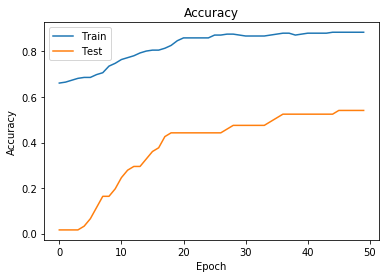

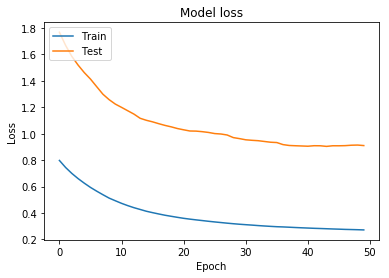

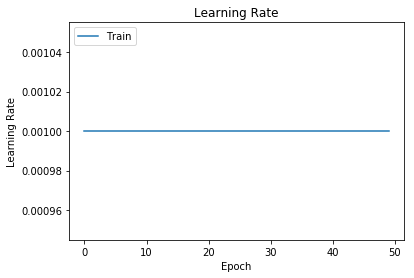

In [136]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['lr'])
plt.title('Learning Rate')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [151]:
max(history.history['val_acc'])

0.5409836182828809

In [158]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,5
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,5


In [173]:
df['Trestbps'] = df.trestbps.apply(lambda x: x // 10)
df['Age'] = df.trestbps.apply(lambda x: x // 10)

In [175]:
X = StandardScaler().fit_transform(df.drop(['target'], axis=1))
y = df[['target']].values

/home/mark/anaconda3/envs/myf/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mark/anaconda3/envs/myf/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [176]:
model = create_model()
history = model.fit(X, y, validation_split=0.20, epochs=epochs,
                    batch_size=batch_size, verbose=1, callbacks=[reduce_lr])

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 3s 13ms/step - loss: 10.9896 - acc: 0.2645 - val_loss: 1.0000e-07 - val_acc: 0.9508
Epoch 2/50
242/242 [==============================] - 0s 249us/step - loss: 10.9896 - acc: 0.2645 - val_loss: 1.0000e-07 - val_acc: 0.9508
Epoch 3/50
242/242 [==============================] - 0s 341us/step - loss: 10.9896 - acc: 0.2645 - val_loss: 1.0000e-07 - val_acc: 0.9508
Epoch 4/50
242/242 [==============================] - 0s 327us/step - loss: 10.9896 - acc: 0.2645 - val_loss: 1.0000e-07 - val_acc: 0.9508
Epoch 5/50
242/242 [==============================] - 0s 330us/step - loss: 10.9896 - acc: 0.2645 - val_loss: 1.0000e-07 - val_acc: 0.9508
Epoch 6/50
242/242 [==============================] - 0s 342us/step - loss: 10.9896 - acc: 0.2645 - val_loss: 1.0000e-07 - val_acc: 0.9508
Epoch 7/50
242/242 [==============================] - 0s 360us/step - loss: 10.9896 - acc: 0.2645 - val_loss: 1.0000e-07 -

In [177]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])

In [178]:
max(history.history['val_acc'])

0.9508196604056437